#**Name: Sachet Utekar**

##**TECHEDU(TIP21) Task 2: EDA on NOBEL PRIZE DISTRIBUTION Dataset and give a satisfactory conclusion.**

##**Dataset Link: https://bit.ly/3n7Y76C**

##**Importing Necessary Libraries and taking care of warnings**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#pandas has an options system that lets you customize some aspects of its behaviour, 
#display-related options being those the user is most likely to adjust.

pd.options.display.max_rows = 10 
pd.options.display.float_format = '{:,.0f}'.format

##**Importing Dataset**

In [ ]:
#reading the dataset
#encoding is important as 'utf-8' codec can't decode byte 0x8d in this dataset
dataset = pd.read_csv('/content/nobel_prize_by_winner.csv', encoding = 'latin1', parse_dates = ["born", "died"]) 
dataset.head(6)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,"2,009",economics,NaN,2,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,"2,009",economics,NaN,2,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,"2,004",peace,NaN,1,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,"1,964",chemistry,NaN,1,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,"2,015",medicine,NaN,2,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
5,428,Barbara,McClintock,6/16/1902,9/2/1992,USA,US,"Hartford, CT",USA,US,"Huntington, NY",female,"1,983",medicine,NaN,1,"""for her discovery of mobile genetic elements""",Cold Spring Harbor Laboratory,"Cold Spring Harbor, NY",USA


In [ ]:
#Taking a peek at the first row of the data:
!head -n 1 /content/nobel_prize_by_winner.csv 

id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country


##**Analysing the Dataset**

In [ ]:
#getting the shape of the data
#(rows * columns)
dataset.shape

(972, 20)

In [ ]:
dataset.info() #information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 972 non-null    int64  
 1   firstname          966 non-null    object 
 2   surname            936 non-null    object 
 3   born               946 non-null    object 
 4   died               946 non-null    object 
 5   bornCountry        940 non-null    object 
 6   bornCountryCode    940 non-null    object 
 7   bornCity           938 non-null    object 
 8   diedCountry        601 non-null    object 
 9   diedCountryCode    600 non-null    object 
 10  diedCity           595 non-null    object 
 11  gender             972 non-null    object 
 12  year               966 non-null    float64
 13  category           966 non-null    object 
 14  overallMotivation  16 non-null     object 
 15  share              966 non-null    float64
 16  motivation         878 non

In [ ]:
dataset.describe() #describing the dataset

,id,year,share
count,972,966,966
mean,471,"1,970",2
std,275,33,1
min,1,"1,901",1
25%,231,"1,947",1
50%,464,"1,976",2
75%,720,"1,999",3
max,934,"2,016",4


In [ ]:
dataset.nunique() #finding out unique records

id            907
firstname     789
surname       830
born          858
died          577
             ... 
share           4
motivation    563
name          315
city          186
country        29
Length: 20, dtype: int64

In [ ]:
dataset.isna().any() #checking for missing values

id            False
firstname      True
surname        True
born           True
died           True
              ...  
share          True
motivation     True
name           True
city           True
country        True
Length: 20, dtype: bool

In [ ]:
dataset.isna().sum() #sum of missing values per record

id              0
firstname       6
surname        36
born           26
died           26
             ... 
share           6
motivation     94
name          252
city          258
country       258
Length: 20, dtype: int64

In [ ]:
#replacing 0 by nan
from numpy import nan
dataset = dataset.replace(0, nan)

In [ ]:
dataset

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,"2,009",economics,NaN,2,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,"2,009",economics,NaN,2,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,"2,004",peace,NaN,1,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,"1,964",chemistry,NaN,1,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,"2,015",medicine,NaN,2,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,525,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,"1,965",peace,NaN,1,NaN,NaN,NaN,NaN
968,527,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,"1,969",peace,NaN,1,NaN,NaN,NaN,NaN
969,537,Amnesty International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,"1,977",peace,NaN,1,NaN,NaN,NaN,NaN
970,547,International Physicians for the Prevention of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,"1,985",peace,NaN,1,NaN,NaN,NaN,NaN


##**How many categories and how are they distributed?**

In [ ]:
dataset.category.value_counts()

medicine      227
physics       222
chemistry     194
peace         130
literature    112
economics      81
Name: category, dtype: int64

In [ ]:
sb.set(style = "white")

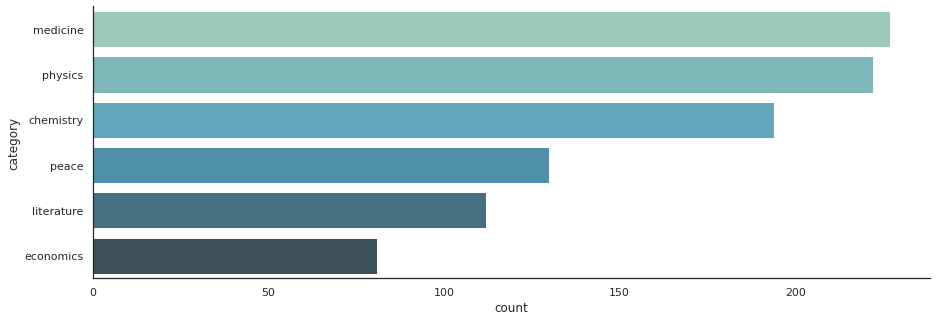

In [ ]:
plt.figure(figsize = (15,5))
sb.countplot(y = 'category', data = dataset, 
              order = dataset.category.value_counts().index,
              palette='GnBu_d')
sb.despine();
plt.savefig('category.png')

##**Males vs. Females**

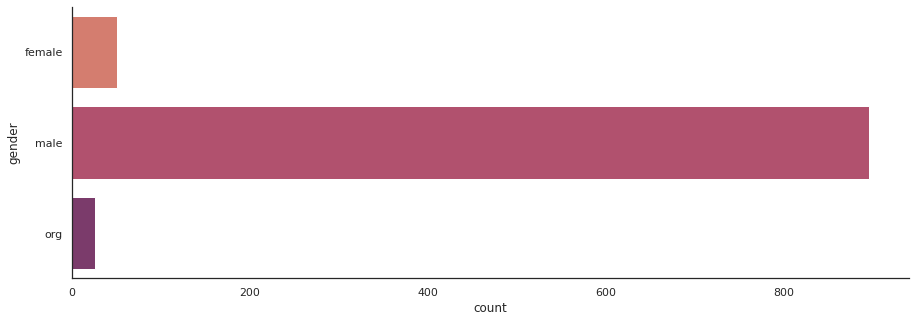

In [ ]:
plt.figure(figsize = (15,5))
sb.countplot(y = 'gender', data = dataset,
             palette = 'flare');
sb.despine()
plt.savefig('gender.png')

##**Nobel Laureates by Organization Country**

In [ ]:
dataset["country"].value_counts()

USA                                  361
United Kingdom                        91
Germany                               51
France                                40
Federal Republic of Germany           26
                                    ... 
Czechoslovakia                         1
Alsace (then Germany, now France)      1
Spain                                  1
Finland                                1
Ireland                                1
Name: country, Length: 29, dtype: int64

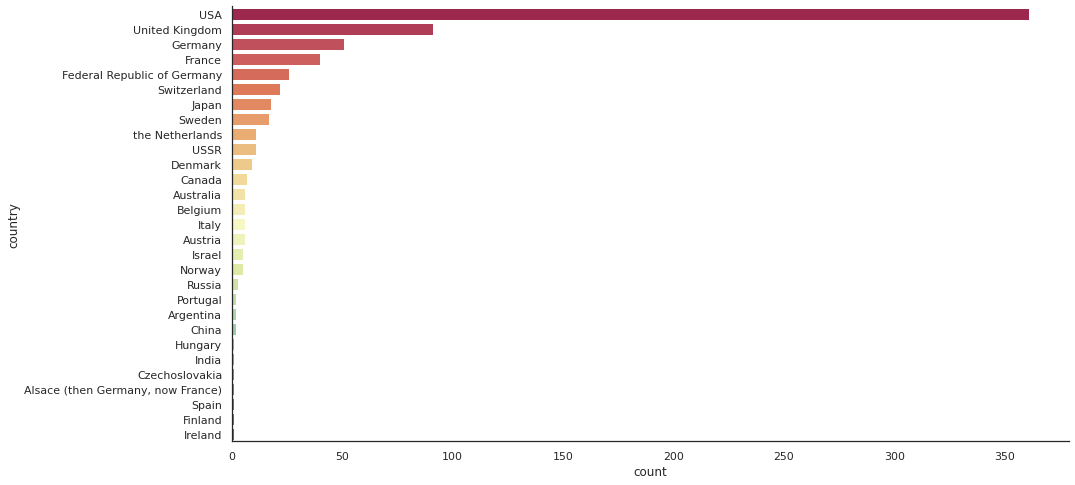

In [ ]:
sb.set(style = 'white')
plt.figure(figsize = (15,8))
sb.countplot(y ='country',
              data = dataset,
              order = dataset['country'].value_counts().index,
              palette='Spectral')
sb.despine()
plt.savefig('countries.png')

##**Nobel Laureates by Birth Country**

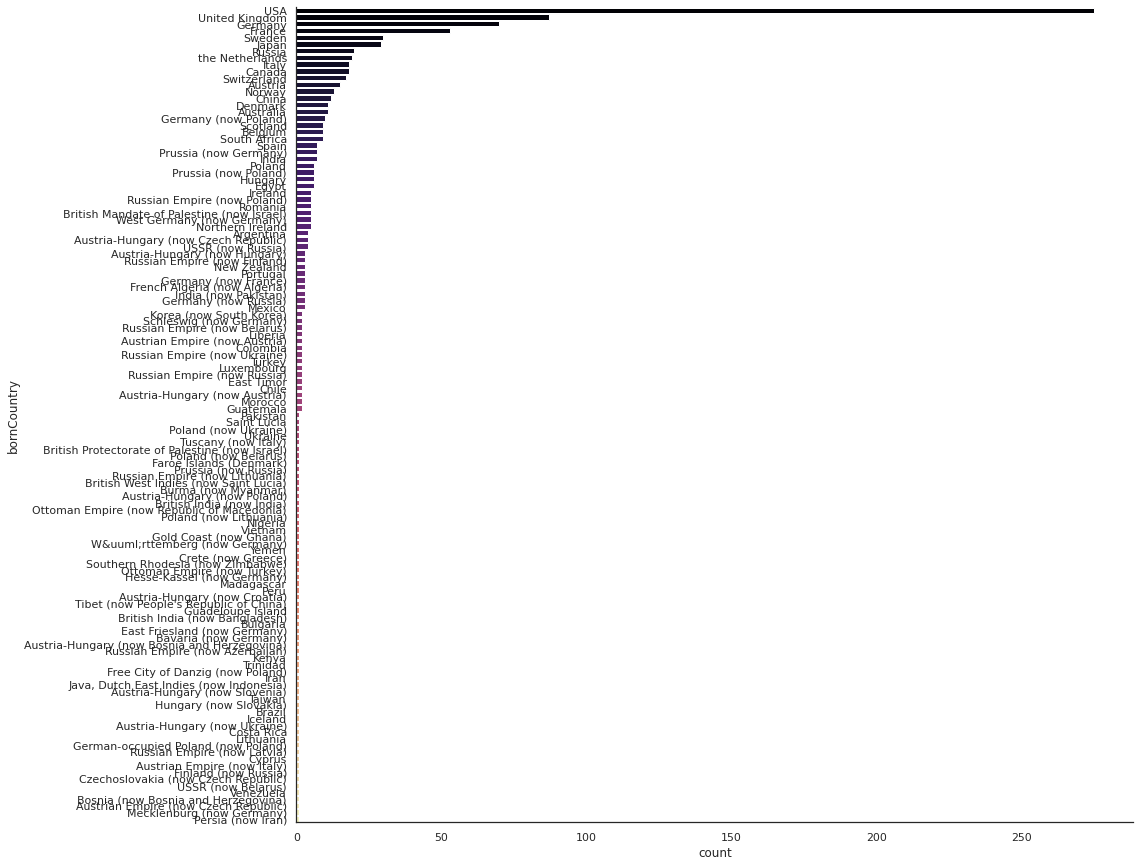

In [ ]:
plt.figure(figsize = (15, 15))
sb.countplot(y = 'bornCountry',
              data = dataset,
              order = dataset['bornCountry'].value_counts().index,
              palette = 'magma')
sb.despine()
plt.savefig('birth.png')

In [ ]:
dataset['bornCountry'].value_counts()

USA                                     275
United Kingdom                           87
Germany                                  70
France                                   53
Sweden                                   30
                                       ... 
Venezuela                                 1
Bosnia (now Bosnia and Herzegovina)       1
Austrian Empire (now Czech Republic)      1
Mecklenburg (now Germany)                 1
Persia (now Iran)                         1
Name: bornCountry, Length: 121, dtype: int64

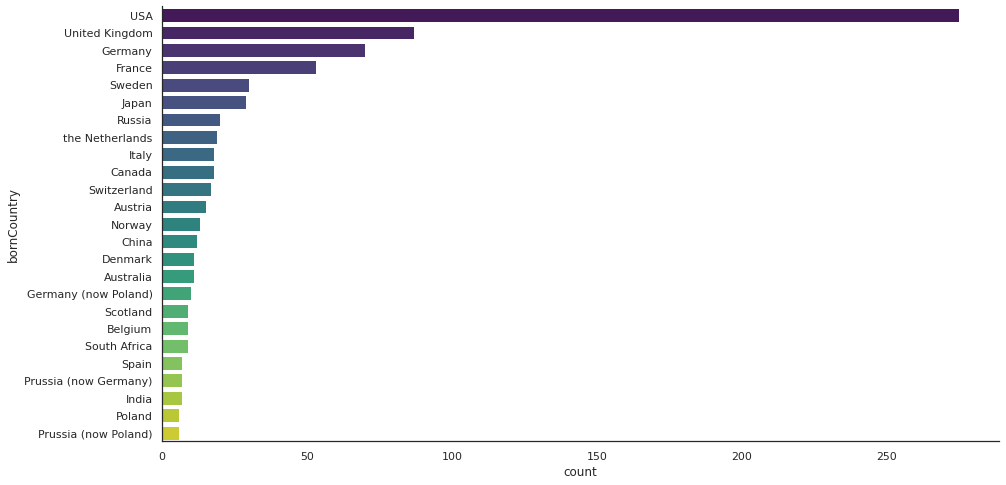

In [ ]:
#plotted 25 major countries
plt.figure(figsize = (15, 8))
sb.countplot(y ='bornCountry',
              data = dataset,
              order = dataset['bornCountry'].value_counts().index[:25],
              palette = 'viridis')
sb.despine()
plt.savefig('birthtop25.png')

##**Age of nobel laureates (at the time of award)**

####Calculate the age using "year" and "birth year(born)"

But there are missing values in "birth year(born)".

In [ ]:
dataset["born"].value_counts().head()

0000/00/00    17
11/9/1952      3
3/7/1938       3
3/15/1930      3
03/23/1881     3
Name: born, dtype: int64

Replace "nan" with 0s:

In [ ]:
dataset = dataset.replace(to_replace = "nan", value = 0)

In [ ]:
dataset["born"] = dataset['born'].str.replace('/', '')

In [ ]:
dataset["born"] = dataset["born"].str.strip().str[-4:]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 972 non-null    int64  
 1   firstname          966 non-null    object 
 2   surname            936 non-null    object 
 3   born               946 non-null    object 
 4   died               946 non-null    object 
 5   bornCountry        940 non-null    object 
 6   bornCountryCode    940 non-null    object 
 7   bornCity           938 non-null    object 
 8   diedCountry        601 non-null    object 
 9   diedCountryCode    600 non-null    object 
 10  diedCity           595 non-null    object 
 11  gender             972 non-null    object 
 12  year               966 non-null    float64
 13  category           966 non-null    object 
 14  overallMotivation  16 non-null     object 
 15  share              966 non-null    float64
 16  motivation         878 non

##**Convert Birth Year("born") column from str to numeric:**

In [ ]:
dataset["born"] = pd.to_numeric(dataset["born"])

In [ ]:
dataset["born"].head()

0   1,933
1   1,933
2   1,940
3   1,910
4   1,930
Name: born, dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 972 non-null    int64  
 1   firstname          966 non-null    object 
 2   surname            936 non-null    object 
 3   born               946 non-null    float64
 4   died               946 non-null    object 
 5   bornCountry        940 non-null    object 
 6   bornCountryCode    940 non-null    object 
 7   bornCity           938 non-null    object 
 8   diedCountry        601 non-null    object 
 9   diedCountryCode    600 non-null    object 
 10  diedCity           595 non-null    object 
 11  gender             972 non-null    object 
 12  year               966 non-null    float64
 13  category           966 non-null    object 
 14  overallMotivation  16 non-null     object 
 15  share              966 non-null    float64
 16  motivation         878 non

##**Calculation of age during awarding of Nobel:**

In [ ]:
dataset["Age"] = dataset["year"] - dataset["born"]

In [ ]:
dataset['Age'] = dataset['Age'].replace(to_replace = "nan", value = 0)

In [ ]:
dataset["Age"] = pd.to_numeric(dataset["Age"])

####Taking care of garbage values

In [ ]:
dataset["Age"] = dataset["Age"].astype(str).str.replace('2016', '60')

In [ ]:
dataset["Age"] = dataset["Age"].astype(str).str.replace('2011', '')

In [ ]:
dataset["Age"] = dataset["Age"].astype(str).str.replace('2009', '')

In [ ]:
dataset["Age"] = dataset["Age"].astype(int, copy = True, errors='ignore')

In [ ]:
dataset['Age'] = dataset['Age'].replace(to_replace = "nan", value = 0)

In [ ]:
dataset['Age'] = pd.to_numeric(dataset['Age'], errors='raise', downcast = None)

####Displaying array of Ages

In [ ]:
dataset["Age"].iloc[:948].values #array of ages

array([76., 76., 64., 54., 85., 81., 56., 55., 56., 58., 46., 75., 67.,
       46., 73., 70., 56., 48., 61., 57., 53., 51., 77., 70., 57., 61.,
       51., 73., 39., 32., 17., 47., 51., 44., 33., 36., 38., 82., 46.,
       88., 62., 68., 56., 33., 32., 80., 69., 62., 71., 79., 71., 80.,
       49., 68., 59., 52., 80., 79., 74., 53., 56., 62., 67., 73., 60.,
       47., 61., 72., 70., 49., 64., 64., 49., 59., 45., 61., 68., 53.,
       66., 62., 49., 48., 42., 68., 68., 68., 68., 76., 76., 52., 36.,
       74., 66., 58., 84., 75., 75., 62., 62., 68., 56., 90., 57., 71.,
       66., 73., 69., 64., 58., 70., 77., 63., 73., 61., 67., 55., 60.,
       84., 47., 67., 74., 78., 78., 67., 63., 55., 80., 58., 40., 54.,
       60., 60., 52., 52., 44., 58., 67., 63., 69., 61., 61., 65., 78.,
       57., 51., 60., 65., 37., 73., 56., 63., 64., 64., 67., 75., 47.,
       62., 51., 63., 56., 51., 38., 33., 65., 42., 68., 56., 52., 67.,
       52., 44., 72., 72., 60., 62., 47., 49., 50., 81., 69., 54

In [ ]:
dataset.Age.value_counts().head()

60    40
0     35
61    35
63    34
64    34
Name: Age, dtype: int64

In [ ]:
dataset.Age.describe()

count   972
mean     57
std      16
min       0
25%      49
50%      59
75%      68
max      90
Name: Age, dtype: float64

##**Distribution of age of Nobel Prize awardees:**

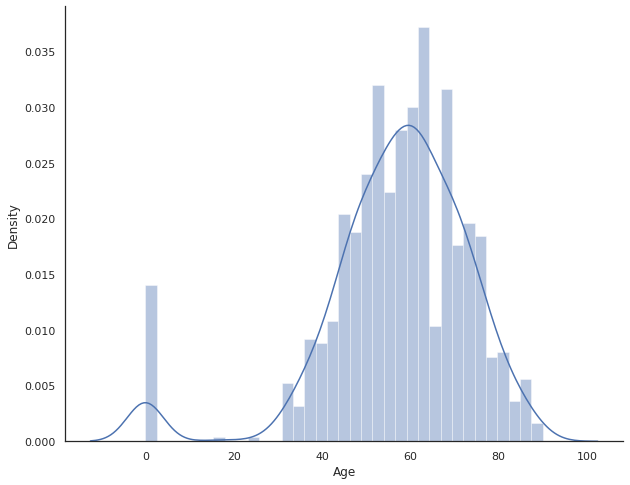

In [ ]:
plt.figure(figsize = (10,8))
sb.distplot(dataset["Age"].dropna(), bins = 35)
sb.set(style='white')
sb.despine();
plt.savefig('AgeGroup.png')

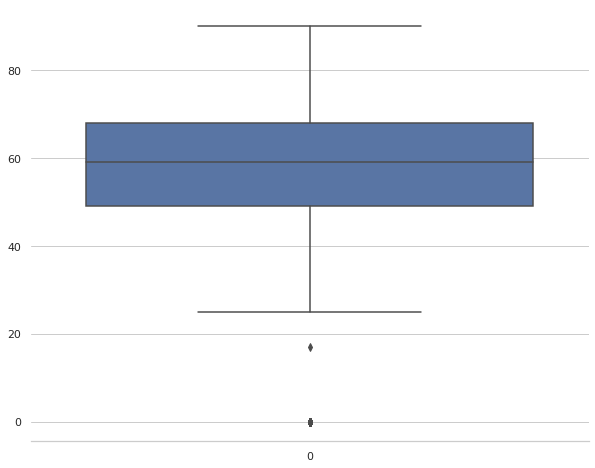

In [ ]:
plt.figure(figsize = (10,8))
sb.set_style("whitegrid")
sb.boxplot(data = dataset.Age)
sb.despine(left = True)
plt.savefig('AgeGroup(Boxplot).png')

##**Birth Country and Category**

In [ ]:
birthcountry_category = dataset.groupby("bornCountry")["category"].value_counts().sort_values(ascending = False)
birthcountry_category

bornCountry              category 
USA                      medicine     74
                         physics      70
                         chemistry    57
                         economics    47
United Kingdom           medicine     26
                                      ..
Luxembourg               physics       1
                         medicine      1
Lithuania                chemistry     1
Korea (now South Korea)  peace         1
Japan                    peace         1
Name: category, Length: 262, dtype: int64

In [ ]:
birth1 = birthcountry_category.fillna(0)
birth1

bornCountry              category 
USA                      medicine     74
                         physics      70
                         chemistry    57
                         economics    47
United Kingdom           medicine     26
                                      ..
Luxembourg               physics       1
                         medicine      1
Lithuania                chemistry     1
Korea (now South Korea)  peace         1
Japan                    peace         1
Name: category, Length: 262, dtype: int64

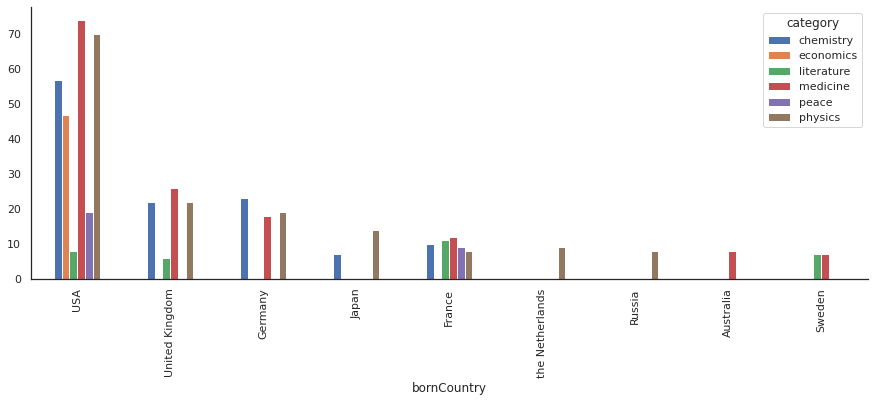

In [ ]:
birth1[:25].unstack().plot(kind = 'bar', figsize=(15, 5))
sb.despine();
plt.savefig('countrycategory.png')

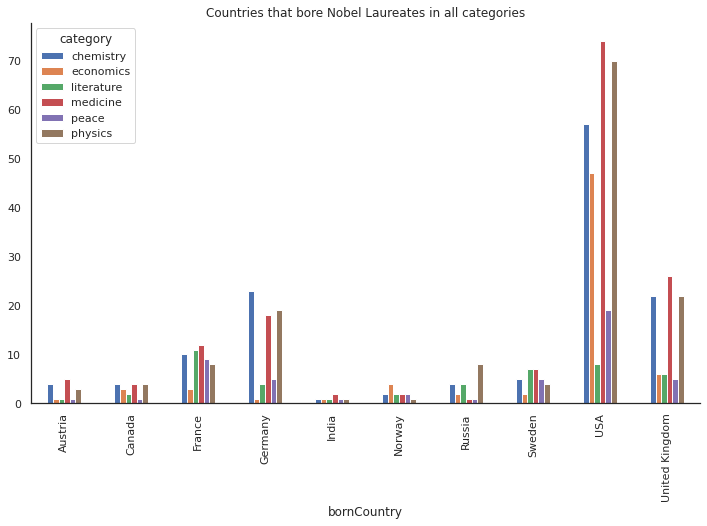

In [ ]:
#countries that bore Nobel Laureates in all categories
sb.set(style="white")
birthcountry_category.unstack().dropna().plot(kind = 'bar', figsize=(12, 7), grid = None, title = "Countries that bore Nobel Laureates in all categories")
sb.despine();
plt.savefig('allcategoriescountries.png')

#**You are most likely to be awarded a Nobel Prize if you are:**
##1. a male  
##2. from the area of medicine 
##3. living in the USA country
##4. around 60 years old



##**Analysis of Motivation Column**

In [ ]:
dataset.motivation.str.count('\w').describe()

count   878
mean     83
std      35
min      18
25%      56
50%      80
75%     104
max     279
Name: motivation, dtype: float64

In [ ]:
chemistry = dataset[dataset.category == "chemistry"]

In [ ]:
chemistry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 3 to 850
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 194 non-null    int64  
 1   firstname          194 non-null    object 
 2   surname            194 non-null    object 
 3   born               194 non-null    float64
 4   died               194 non-null    object 
 5   bornCountry        194 non-null    object 
 6   bornCountryCode    194 non-null    object 
 7   bornCity           194 non-null    object 
 8   diedCountry        119 non-null    object 
 9   diedCountryCode    118 non-null    object 
 10  diedCity           119 non-null    object 
 11  gender             194 non-null    object 
 12  year               194 non-null    float64
 13  category           194 non-null    object 
 14  overallMotivation  9 non-null      object 
 15  share              194 non-null    float64
 16  motivation         194 non

In [ ]:
chemistry.motivation.str.count('\w').describe()

count   194
mean     74
std      32
min      23
25%      50
50%      62
75%      93
max     176
Name: motivation, dtype: float64

In [ ]:
print(chemistry.motivation)

3      "for her determinations by X-ray techniques of...
15     "for studies of the structure and function of ...
33     "in recognition of her services to the advance...
36     "in recognition of their synthesis of new radi...
118    "for his biochemical researches and his discov...
                             ...                        
846    "in recognition of their contributions to the ...
847    "in recognition of their contributions to the ...
848    "in recognition of their contributions to the ...
849    "in recognition of their contributions to the ...
850    "in recognition of their synthesis of new radi...
Name: motivation, Length: 194, dtype: object


In [ ]:
allmotivation = ' '.join(chemistry.motivation)

##**Wordcloud for Chemistry Category**

In [ ]:
import wordcloud

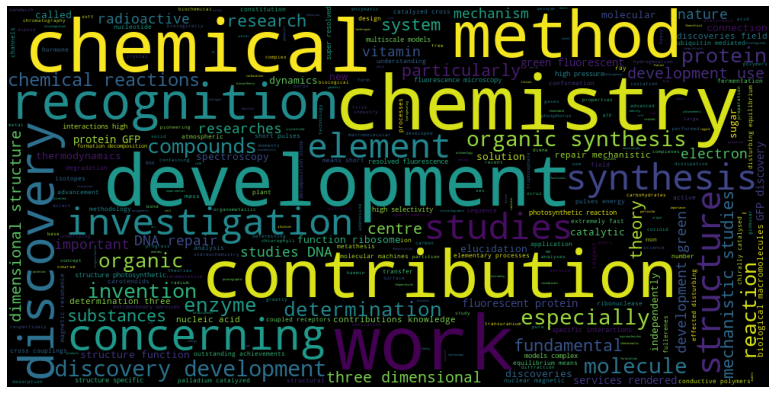

In [ ]:

cloud = wordcloud.WordCloud(background_color='black',
                            max_font_size=100,
                            width=1000,
                            height=500,
                            max_words=300,
                            relative_scaling=.5).generate(allmotivation)
plt.figure(figsize=(16, 7))
plt.axis('off')
plt.savefig('chemistrynobel.png')
plt.imshow(cloud);

##**Wordcloud for all Categories**

In [ ]:
nobelmotivation = ' '.join(dataset.motivation.dropna())

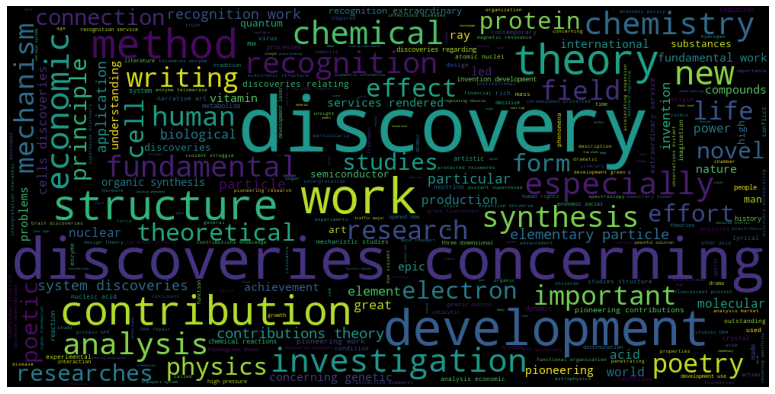

In [ ]:
cloud = wordcloud.WordCloud(background_color = 'black',
                            max_font_size = 100,
                            width = 1000,
                            height = 500,
                            max_words = 300,
                            relative_scaling = .5).generate(nobelmotivation)
plt.figure(figsize=(16, 7))
plt.axis('off')
plt.savefig('nobelmotivation.png')
plt.imshow(cloud);